In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv


In [2]:
data_train=pd.read_csv('dataset/sign_mnist_train.csv')
data_test=pd.read_csv('dataset/sign_mnist_test.csv')

In [3]:
data_train.shape

(27455, 785)

In [4]:
data_test.shape

(7172, 785)

In [5]:
data_train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


/Users/deiry/.local/share/virtualenvs/sign-language-recognizer-KjFszic7/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


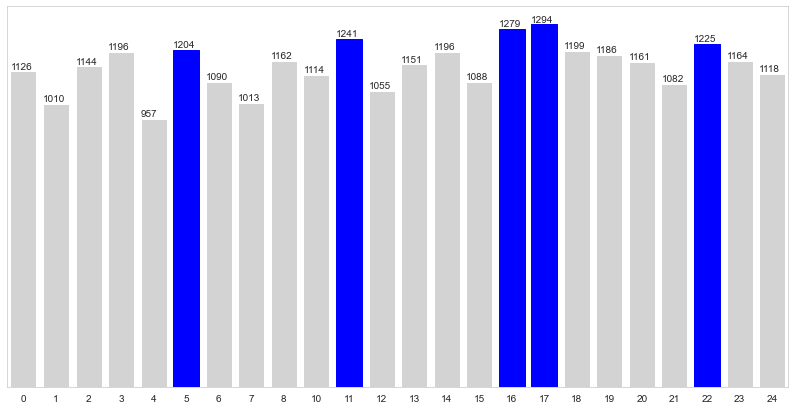

In [7]:

sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
g = sns.countplot(data_train['label'], color='lightgrey')

for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10))
    if p.get_height() > 1200:
        p.set_color('blue')
g.set_ylabel('')    
g.set_xlabel('')
g.axes.get_yaxis().set_visible(False)

In [8]:
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


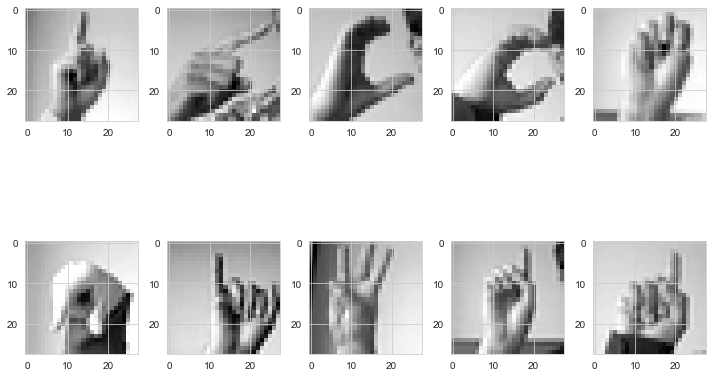

In [9]:
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

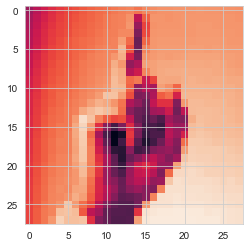

In [10]:
plt.imshow(training_images[0])

In [11]:
training_images[0].shape

(28, 28, 1)

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
858/857 [==============================] - 27s 31ms/step - loss: 2.6818 - accuracy: 0.1812 - val_loss: 1.7306 - val_accuracy: 0.4158
Epoch 2/10
858/857 [==============================] - 27s 32ms/step - loss: 1.8557 - accuracy: 0.4026 - val_loss: 1.2576 - val_accuracy: 0.5630
Epoch 3/10
858/857 [==============================] - 27s 31ms/step - loss: 1.4530 - accuracy: 0.5255 - val_loss: 1.1671 - val_accuracy: 0.5818
Epoch 4/10
858/857 [==============================] - 29s 34ms/step - loss: 1.2106 - accuracy: 0.5996 - val_loss: 0.6409 - val_accuracy: 0.7805
Epoch 5/10
858/857 [==============================] - 29s 34ms/step - loss: 1.0463 - accuracy: 0.6578 - val_loss: 0.5030 - val_accuracy: 0.8298
Epoch 6/10
858/857 [==============================] - 27s 32ms/step - loss: 0.9190 - accuracy: 0.6951 - val_loss: 0.5831 - val_accuracy: 0.7868
Epoch 7/10
858/857 [==============================] - 27s 31

[109.12352752685547, 0.7487451434135437]

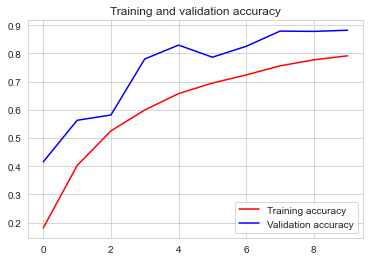

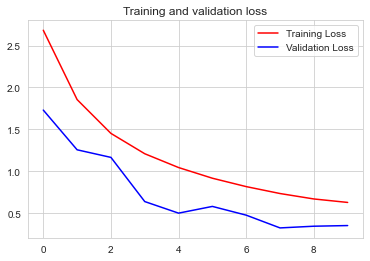

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [15]:
# Predictions 
predictions = model.predict_classes(testing_images)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]   

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([ 6,  8, 11,  0, 12])

In [16]:
model.save('model_train.h5')

In [4]:
model = keras.models.load_model('model_train.h5')

In [21]:
pred_proba.sum()

7172.0

In [67]:
def process_image(path):
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_NEAREST)
    plt.imshow(resized, cmap='gray')
    resized = resized[np.newaxis,..., np.newaxis]
    return resized
    

[19]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]]


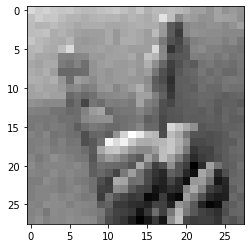

In [70]:
image_v = process_image('dataset/v.jpeg')
result = model.predict_classes(image_v)
print(result)
proba = model.predict_proba(image_v)
print(proba)

In [49]:
import cv2 
img = cv2.imread('dataset/a.jpeg')  

In [45]:
from PIL import Image

img = Image.open('dataset/a.jpeg') # image extension *.png,*.jpg


In [ ]:
new_width  = 28
new_height = 28
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save('output image name.png') # format may what you want *.png, *jpg, *.gif


In [48]:
img

AttributeError: 'Image' object has no attribute 'shape'

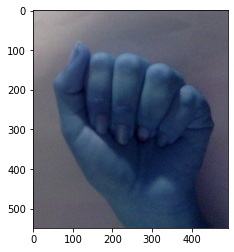

In [50]:
plt.imshow(img)

In [51]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [52]:
gray.shape

(549, 491)

In [31]:
resized = resize_image(gray)

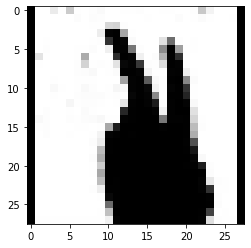

In [33]:
plt.imshow(resized, cmap='gray')

In [53]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_NEAREST)

In [15]:
def resize_image(img, size=(28,28)):

    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1

    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)

    dif = h if h > w else w

    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC

    x_pos = (dif - w)//2
    y_pos = (dif - h)//2

    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]

    return cv2.resize(mask, size, interpolation)

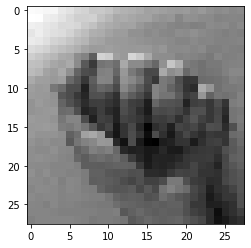

In [54]:
plt.imshow(resized, cmap='gray')

In [55]:
resized = resized[np.newaxis,..., np.newaxis]

In [56]:
resized.shape

(1, 28, 28, 1)

In [46]:

resized = cv2.resize(gray1, (28,28), interpolation = cv2.INTER_AREA)

In [47]:
resized.shape

(28, 28)

In [62]:
testing_images.shape

(7172, 28, 28, 1)

In [57]:
result = model.predict_classes(resized)

In [59]:
result

array([0])

In [42]:
model.predict_proba(resized)

Instructions for updating:
Please use `model.predict()` instead.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)